In [1]:
import numpy as np
import ssid
import quakeio
from ssid import modal, spec
from ssid.utilities import Config, extract_channels, list_files, print_modes, mode_statistics

### Data inputs

In [2]:
directory = "../CESMD/CE58658/"
pattern  = "????????*.[zZ][iI][pP]"
# pattern = "sanlorenzo_28june2021.zip"
# pattern = "*[sb][ae][nr][lk]*"

with open('../../Caltrans.Hayward/CGS_data/function_test_zips.txt', 'r') as readfile:
    function_tests = readfile.read().split("\n")
import glob
events = [quakeio.read(event) for event in glob.glob('../CGS_data/58658*P.zip') if event[-33:] not in function_tests]

from pathlib import Path
# for file in Path(directory).glob(pattern):
#     if str(file)[-33:] in function_tests:
#         print(file)
files = [file for file in Path(directory).glob(pattern) if str(file)[-33:] not in function_tests]

In [3]:
data_conf = Config()

# # PAINTER RIO DELL TRANSVERSE (CASE 1)
# data_conf.inputs  = [17,3,20]
# data_conf.outputs = [9,7,4]
# # PAINTER RIO DELL LONGITUDINAL (CASE 2)
# data_conf.inputs  = [15,1,18]
# data_conf.outputs = [11]

# # HWY8/MELOLAND TRANSVERSE (CASE 1)
# data_conf.inputs  = [2],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND TRANSVERSE (CASE 2)
# data_conf.inputs  = [11,2,26],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND LONGITUDINAL (CASE 3)
# data_conf.inputs  = [12,4,25],
# data_conf.outputs = [27,8]

# # CROWLEY TRANSVERSE (CASE 1)
# data_conf.inputs = [4]
# data_conf.outputs = [6,7,9]
# # CROWLEY TRANSVERSE (CASE 2)
# data_conf.inputs = [6,4,9]
# data_conf.outputs = [7]
# # CROWLEY TRANSVERSE (CASE 3)
# data_conf.inputs = [4]
# data_conf.outputs = [7]
# # CROWLEY LONGITUDINAL (CASE 4)
# data_conf.inputs = [5]
# data_conf.outputs = [8]

# # RIDGECREST TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [6,7,9]

# # CAPISTRANO TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [10,7]

# HAYWARD TRANSVERSE (CASE 1)
title = "Hayward Bridge Transverse Mode (In: Ch25, Out: Ch23)"
data_conf.inputs  = [25,2,7,18]
data_conf.outputs = [23,13,15,20]
# # HAYWARD LONGITUDINAL (CASE 2)
# title = "Hayward Bridge Longitudinal Mode (In: Ch3, Out: Ch12)"
# data_conf.inputs  = [3,6,17]
# data_conf.outputs = [12,14,19]
# # HAYWARD LONGITUDINAL Alternative
# title = "Hayward Bridge Longitudinal Mode (In: Ch6, Out: Ch14)"
# data_conf.inputs  = [6,3,17]
# data_conf.outputs = [14,12,19]

# # BERNARDINO TRANSVERSE BENT 3 (CASE 1)
# data_conf.inputs  = [6]
# data_conf.outputs = [7,8]
# # BERNARDINO TRANSVERSE BENT 8 (CASE 2)
# data_conf.inputs  = [24]
# data_conf.outputs = [19,20]
# # BERNARDINO LONGITUDINAL BENT 3 (CASE 3)
# data_conf.inputs  = [4]
# data_conf.outputs = [10]
# # BERNARDINO LONGITUDINAL BENT 8 (CASE 4)
# data_conf.inputs  = [22]
# data_conf.outputs = [17,18]

# # VINCENT THOMAS (CE14406) TRANSVERSE (CASE 1)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,5,7]
# # VINCENT THOMAS TRANSVERSE DENSE (CASE 2)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,4,5,6,7]
# # VINCENT THOMAS VERTICAL SOUTH DECK EDGE (CASE 3)
# data_conf.inputs  = [14,19,26]
# data_conf.outputs = [16,18,22]

### Method Inputs

### General Parameters
parameter | value
----------|-------
`p ` | number of output channels
`q ` | number of input channels
`nt` | number of timesteps
`dt` | timestep
`d`  | decimation (downsampling) factor
`r`, `order` | model order (2 times number of DOF)

### Specific to Observer Kalman Identification (OKID)
parameter | value
----------|-------
`m`  | number of Markov parameters to compute (at most = nt)

### Specific to Eigensystem Realization Algorithm (ERA)
parameter | value
----------|-------
`no`, `horizon` | number of observability parameters, or prediction horizon
`nc` | number of controllability parameters

### Specific to Data Correlations (DC)
parameter | value
----------|-------
`a`  | (alpha) number of additional block rows in Hankel matrix of correlation matrices
`b`  | (beta) number of additional block columns in Hankel matrix of correlation matrices
`l`  | initial lag
`g`  | lag (gap) between correlations

### Specific to System Realization with Information Matrix (SRIM)
parameter | value
----------|-------
`no`, `horizon` | number of steps used for identification, or prediction horizon

### Parameters for Mode Validation
parameter | value
----------|-------
`outlook` | number of steps used for temporal consistency in EMAC

In [4]:
# Set Parameters
conf = Config()
conf.m  = 500
conf.horizon = 190
conf.nc = 190
conf.order  = 12
conf.a  = 0  
conf.b  = 0  
conf.l  = 10 
conf.g  = 3
conf.period_band = (0.2,1.6)
conf.damping = 0.06
conf.pseudo = True
conf.outlook = 190

../CESMD/CE58658/58658_002_20210623_17.15.07.P.zip
peak acceleration (cm/s/s): 908.091
4 4 1875
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 996 is different from 760)
../CESMD/CE58658/58658_003_20211002_12.22.00.P.zip
peak acceleration (cm/s/s): 872.494
4 4 1875
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 996 is different from 760)
../CESMD/CE58658/58658_004_20210723_08.59.25.P.zip
peak acceleration (cm/s/s): -847.931
4 4 1338
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 996 is different from 760)
../CESMD/CE58658/58658_004_20230401_09.43.22.P.zip
peak acceleration (cm/s/s): 20.777
4 4 1525
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 996 is different from 760)
../CESMD/CE58658/58658_004_20230401_09.43.22.R.z

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 996 is different from 760)


/home/cmp/mambaforge/envs/brace-platform/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cmp/mambaforge/envs/brace-platform/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/cmp/mambaforge/envs/brace-platform/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cmp/mambaforge/envs/brace-platform/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/cmp/mambaforge/envs/brace-platform/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'Hayward Bridge Transverse Mode (In: Ch25, Out: Ch23)')

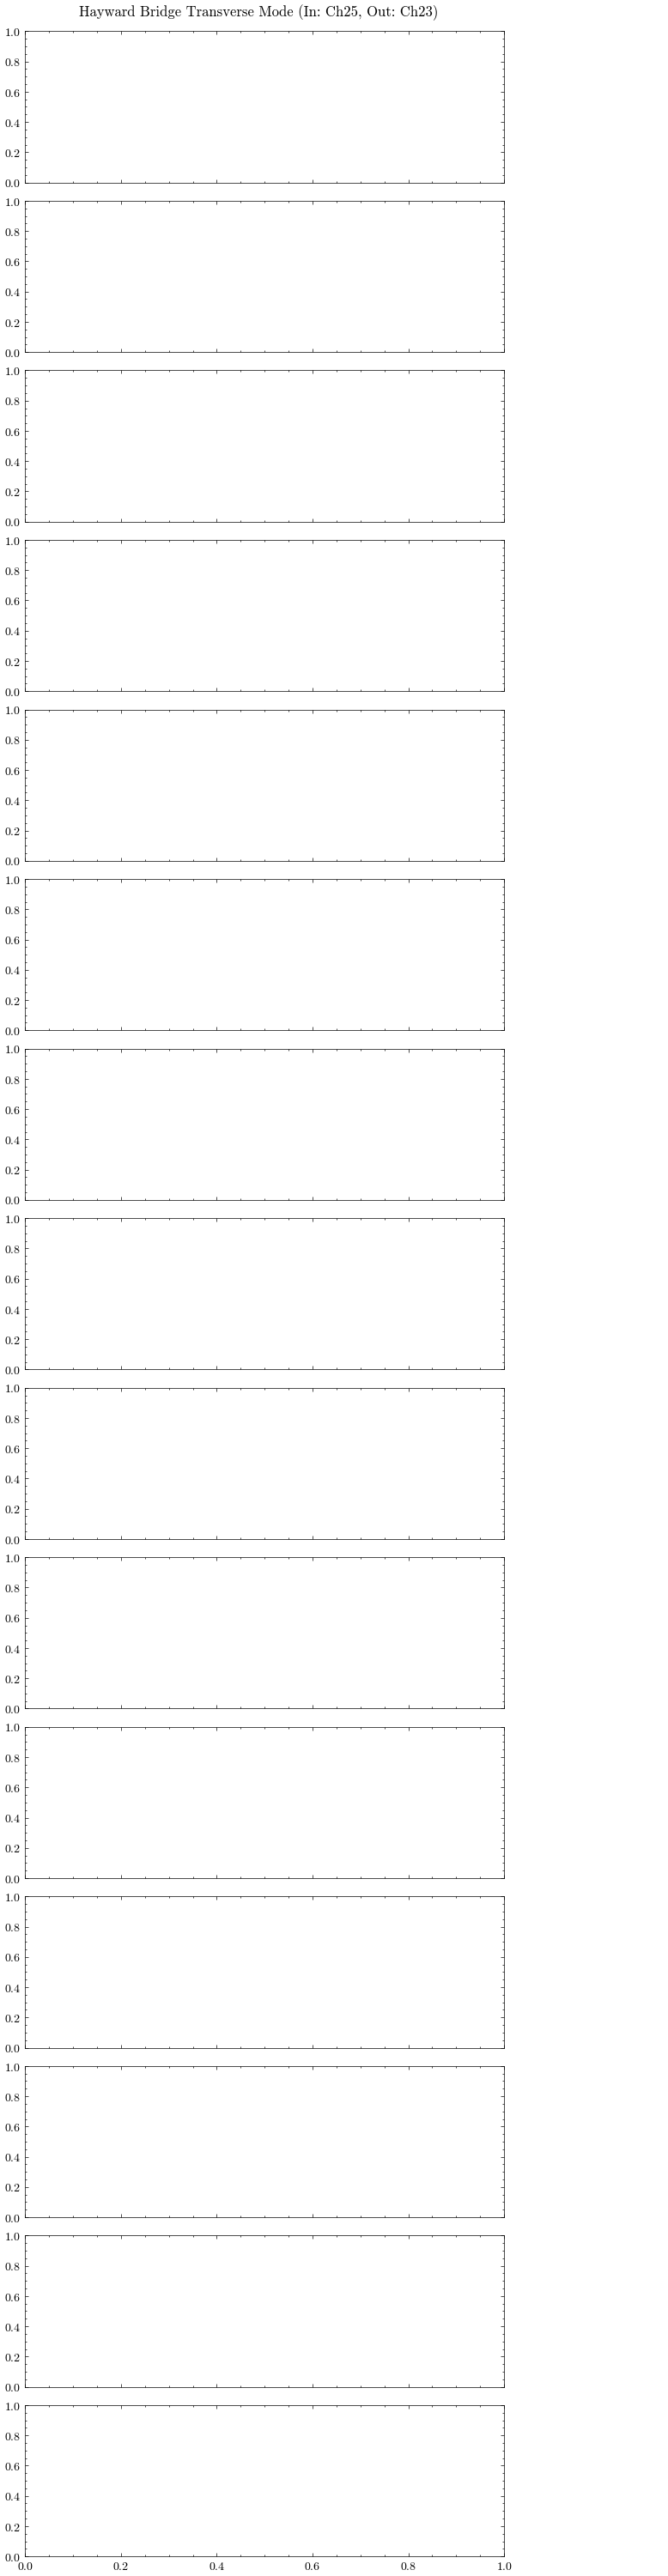

In [5]:
# event_names = ["Berkeley", "San Lorenzo"]
event_modes = []
from matplotlib import pyplot as plt
file_axes = {}

fig, axs = plt.subplots(len(files), figsize=(6,2*len(files)), sharex=True, constrained_layout=True)
axi = iter(axs)

method = "okid-era-dc"

for i, file in enumerate(files):
    ax = next(axi) 
    # fig, ax = plt.subplots(figsize=(10,5))
    print(file)
    try:
        event = quakeio.read(file, exclusions=["*filter*", "*date*"])
        print("peak acceleration (cm/s/s):", event["peak_accel"])
        inputs, dt = extract_channels(event, data_conf.inputs)
        outpts, dt = extract_channels(event, data_conf.outputs)
        conf.decimation = 8 # decimation factor for state space method
        realization = ssid.system(method=method, inputs=inputs, outputs=outpts, threads=18, chunk=200, **conf)
    except Exception as e:
        # raise e
        print(e)
        continue
    ss_modes = modal.system_modes(realization,dt,**conf)
    event_modes.append(list(ss_modes.values()))
    print_modes(ss_modes)
    conf.decimation = 1 # decimation factor for transfer function methods
    periods, amplitudes = spec.fourier_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label=["fourier" if i==0 else None][0], color="blue") #, alpha = (1/(len(files)+2))*(i+1))
    periods, amplitudes = spec.response_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, periods=periods, threads=8, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label=["response spectrum" if i==0 else None][0], color="green") #, alpha = (1/(len(files)+2))*(i+1))
    ax.vlines([1/value["freq"] for value in ss_modes.values() if value["energy_condensed_emaco"]>0.5 and value["mpc"]>0.5], 0, 1, color='r', linestyles='dashed', label=[f"state space ({method})" if i==0 else None][0])
    ax.set_xlim(conf.period_band)
    ax.set_title(file.name)
fig.legend(bbox_to_anchor=(1.3,0.85))
event_frequencies = mode_statistics(event_modes, "freq")
fig.suptitle(title)